# Построение векторных полей на датасетах, построенных по системе Лоренца

# Импорты

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import k3d
from k3d.colormaps import matplotlib_color_maps

from dataset_creator.model.dataset.dataset import Dataset
from dataset_creator.model.dataset.vector_fields import get_tangents_on_interval, get_tangents_on_idxs
from dataset_creator.model.dataset.lorenz_system import lorenz_system, LorenzSystemVariables as lsv
from dataset_creator.utils.metrics import get_linear_deviation


# Построение датасетов

In [2]:
points = lorenz_system(
    x1_0=0.5,
    x2_0=1.0,
    x3_0=1.5,
    t=50.0,
    dt=0.01,
    sigma=10.0,
    rho=28.0,
    beta=8.0 / 3.0,
    mu=1.0
)
dataset_tx1 = Dataset(points[:, [lsv.t, lsv.x1]])
dataset_x12 = Dataset(points[:, [lsv.x1, lsv.x2]])
dataset_x123 = Dataset(points[:, [lsv.x1, lsv.x2, lsv.x2]])

# Датасет по одной переменной и времени

Касательные для интервала

In [3]:
i1, i2 = 490, 505
tangents_in_interval_tx1 = get_tangents_on_interval(dataset_tx1.values, i1, i2, length=2.0)

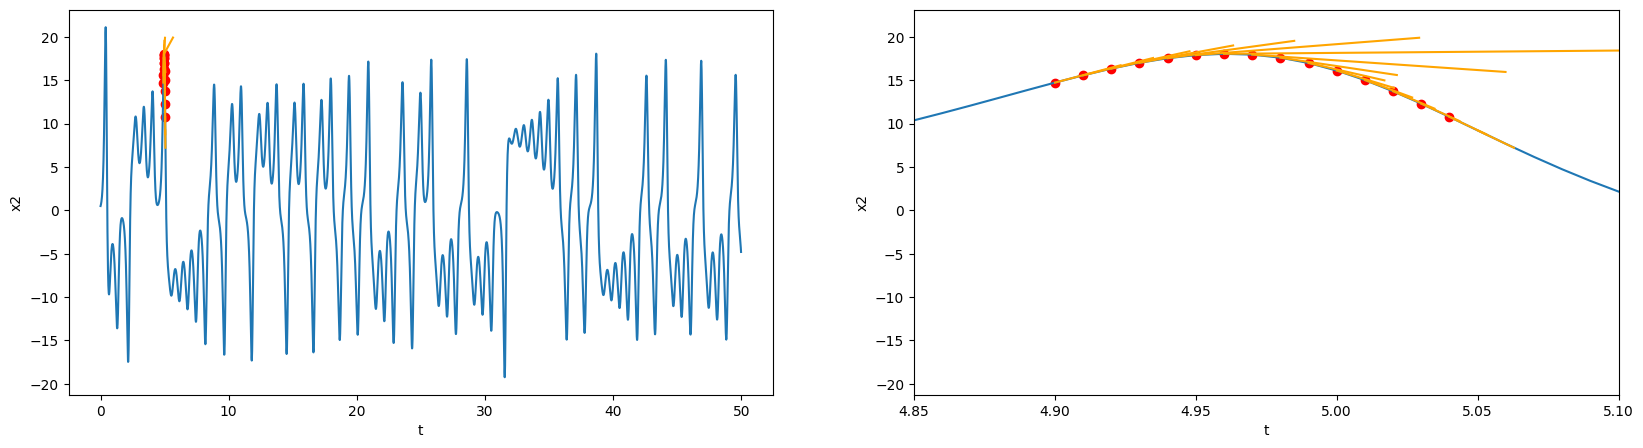

In [4]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(dataset_tx1.values[:, 0], dataset_tx1.values[:, 1])
plt.scatter(dataset_tx1.values[i1:i2, 0], dataset_tx1.values[i1:i2, 1], c="red")
for t in tangents_in_interval_tx1:
    plt.plot(t[:, 0], t[:, 1], color="orange")
plt.xlabel("t")
plt.ylabel("x2")

plt.subplot(1, 2, 2)
plt.plot(dataset_tx1.values[:, 0], dataset_tx1.values[:, 1])
plt.scatter(dataset_tx1.values[i1:i2, 0], dataset_tx1.values[i1:i2, 1], c="red")
for t in tangents_in_interval_tx1:
    plt.plot(t[:, 0], t[:, 1], color="orange")
plt.xlim(4.85, 5.10)
plt.xlabel("t")
plt.ylabel("x2")
plt.show()

# Датасет по двум переменных

In [5]:
colors_x12 = get_linear_deviation(dataset_x12.values)

Касательные для интервала

In [6]:
i1, i2 = 500, 550
tangents_in_interval_x12 = get_tangents_on_interval(dataset_x12.values, i1, i2, length=2.0)

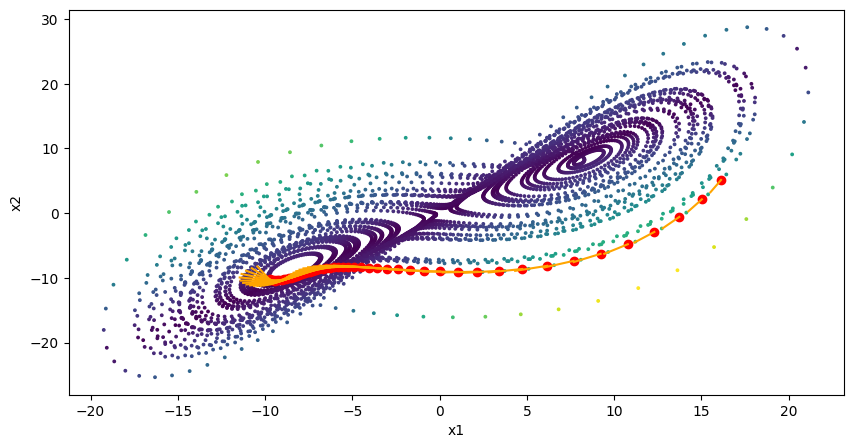

In [7]:
plt.figure(figsize=(10, 5))
plt.scatter(dataset_x12.values[:, 0], dataset_x12.values[:, 1], c=colors_x12, s=3)
plt.scatter(dataset_x12.values[i1:i2, 0], dataset_x12.values[i1:i2, 1], c="red")
for t in tangents_in_interval_x12:
    plt.plot(t[:, 0], t[:, 1], color="orange")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

Касательные для окрестности

In [8]:
neighbours_idxs_x12 = dataset_x12.get_idxs_in_radius(idx=100, r=5.0)
tangents_in_neighbours_x12 = get_tangents_on_idxs(dataset_x12.values, neighbours_idxs_x12, length=0.4)

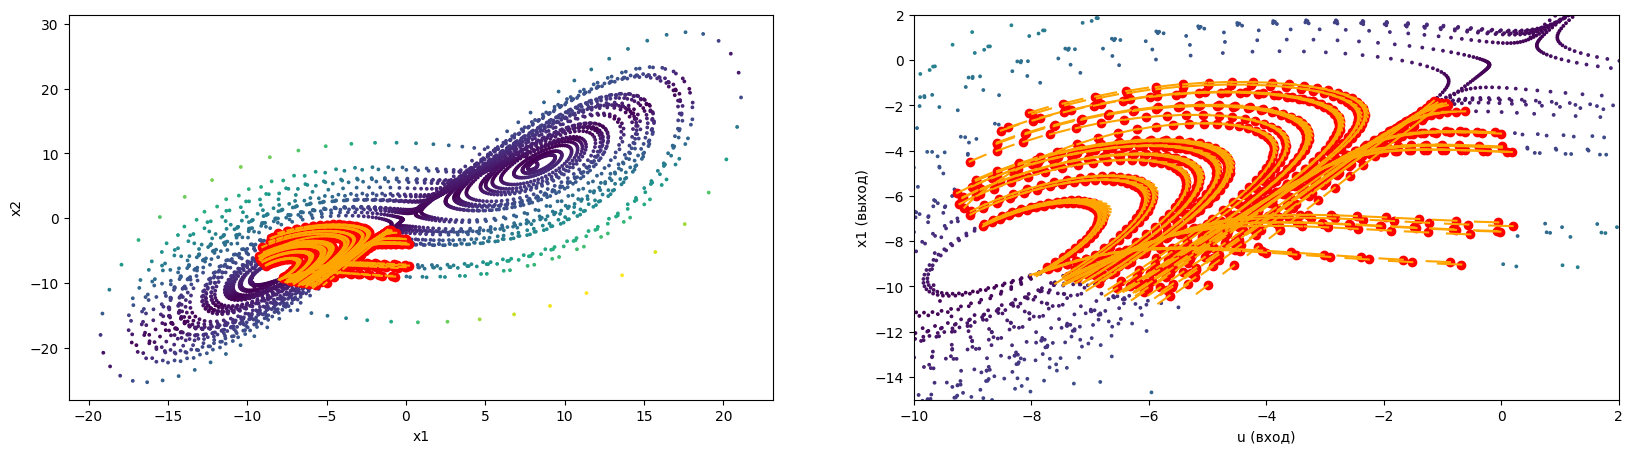

In [9]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.scatter(dataset_x12.values[:, 0], dataset_x12.values[:, 1], c=colors_x12, s=3)
plt.scatter(dataset_x12.values[neighbours_idxs_x12, 0], dataset_x12.values[neighbours_idxs_x12, 1], c="red")
for t in tangents_in_neighbours_x12:
    plt.plot(t[:, 0], t[:, 1], color="orange")
plt.xlabel("x1")
plt.ylabel("x2")

plt.subplot(1, 2, 2)
plt.scatter(dataset_x12.values[:, 0], dataset_x12.values[:, 1], c=colors_x12, s=3)
plt.scatter(dataset_x12.values[neighbours_idxs_x12, 0], dataset_x12.values[neighbours_idxs_x12, 1], c="red")
for t in tangents_in_neighbours_x12:
    plt.plot(t[:, 0], t[:, 1], color="orange")
plt.xlim(-10, 2)
plt.ylim(-15, 2)
plt.xlabel("u (вход)")
plt.ylabel("x1 (выход)")
plt.show()

# Датасет по трем переменных

In [10]:
colors_x123 = get_linear_deviation(dataset_x123.values)

Касательные для интервала

In [11]:
i1, i2 = 500, 550
tangents_in_interval_x123 = get_tangents_on_interval(dataset_x123.values, i1, i2, length=2.0)

In [12]:
plot = k3d.plot(axes=("x1", "x2", "x3"), menu_visibility=False)
plot += k3d.points(
    positions=dataset_x123.values,
    point_size=0.3,
    shader='3d',
    attribute=colors_x123,
    color_map=matplotlib_color_maps.viridis,
)
plot += k3d.points(
    positions=dataset_x123.values[i1:i2 + 1],
    point_size=0.5,
    shader='3d',
    color=0xff0000,
)
for t in tangents_in_interval_x123:
    plot += k3d.line(t, width=0.1, color=0xffa500)
plot.display()

C:\Users\Олег\AppData\Local\Programs\Python\Python39\lib\site-packages\traittypes\traittypes.py:97: UserWarning: Given trait value dtype "float32" does not match required type "float32". A coerced copy has been created.
  warnings.warn(


Output()

Касательные для окрестности

In [13]:
neighbours_idxs_x123 = dataset_x123.get_idxs_in_radius(idx=100, r=1.0)
tangents_in_neighbours_x123 = get_tangents_on_idxs(dataset_x123.values, neighbours_idxs_x123, length=0.4)

In [14]:
plot = k3d.plot(axes=("x1", "x2", "x3"), menu_visibility=False)
plot += k3d.points(
    positions=dataset_x123.values,
    point_size=0.1,
    shader='3d',
    attribute=colors_x123,
    color_map=matplotlib_color_maps.viridis,
)
plot += k3d.points(
    positions=dataset_x123.values[neighbours_idxs_x123],
    point_size=0.2,
    shader='3d',
    color=0xff0000,
)
for t in tangents_in_neighbours_x123:
    plot += k3d.line(t, width=0.1, color=0xffa500)
plot.display()

Output()